In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Gravitational Instability 

## Dispersion relation

In the lectures, we derived the dispersion relation for self-gravitating density waves:
\\[\omega^2 = k^2c_s^2 + \kappa^2 - \frac{2\kappa c_s|k|}{Q},\\]
where \\(\omega\\) is the temporal frequency of the mode, \\(k\\) is the 'radial' wavenumber, \\(c_s\\) the sound speed, \\(\kappa\\) the epicyclic frequency and \\(Q\\) the Toomre parameter:
\\[Q= \frac{\kappa c_s}{\pi G\Sigma_0}.\\]
Divide both sides of the dispersion relation by $\kappa^2$:
\\[\left(\frac{\omega}{\kappa}\right)^2 = \left(\frac{c_sk}{\kappa}\right)^2 + 1 - \frac{2}{Q}\left|\frac{c_sk}{\kappa}\right|.\\]
Remember that we took perturbations \\(\propto \exp(-{\rm i} \omega t)\\), which means that if \\(\omega\\) has a positive imaginary part, we get exponential growth. This happens of course when \\(\omega^2 < 0\\). In the figure below, \\(\omega^2\\) is shown as a function of wave number (in the dimensionless form above). You can vary \\(Q\\) to verify the point where exponential growth is possible. Where is the most unstable wavenumber?

FloatSlider(value=10.0, continuous_update=False, description='$Q$:', max=10.0, min=0.5, readout_format='.3f', …

Output()

<IPython.core.display.Javascript object>


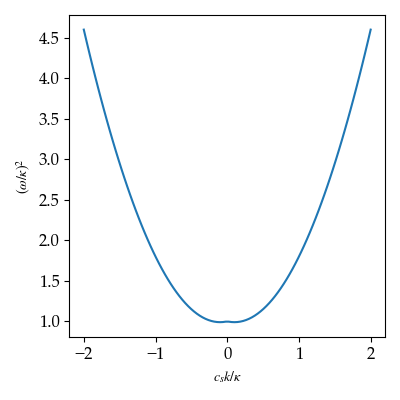

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.linalg import expm
from IPython.display import display, update_display, HTML
import ipywidgets as widgets

# Try and make plots look nice
plt.rcParams["font.family"] = 'serif'
plt.rcParams["mathtext.fontset"] = 'stix'
plt.rcParams["font.serif"] = 'Palatino'
plt.rcParams['pdf.fonttype'] = 42
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

w_q = widgets.FloatSlider(
    value=10,
    min=0.5,
    max=10,
    step=0.01,
    description=r'$Q$:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

# Display eccentricity slider
output = widgets.Output()
display(w_q, output)

def disp_w2(k, Q):
    return k*k + 1 - 2*np.abs(k)/Q

Q_toomre = 10
wave_number = np.linspace(-2, 2, 100)

fig = plt.figure(figsize=(4,4),num='Dispersion relation')
ax = plt.gca()

ax.set_xlabel(r'$c_sk/\kappa$')
ax.set_ylabel(r'$(\omega/\kappa)^2$')

line, = ax.plot(wave_number, disp_w2(wave_number, Q_toomre));

plt.tight_layout()
    
def on_value_change_q(change):
    with output:
        global Q_toomre
        Q_toomre = change['new']
        wave_number = np.linspace(-2, 2, 100)
        line.set_data(wave_number, disp_w2(wave_number, Q_toomre));

        ax.relim()
        ax.autoscale()
        plt.tight_layout()
 
w_q.observe(on_value_change_q, names='value')


## Amplitude evolution

To arrive at the dispersion relation, we took small perturbations on top of an equilibrium solution. For example, for the surface density we wrote \\(\Sigma(x,t) = \Sigma_0 + \Sigma_1(x,t)\\) with \\(\Sigma_1 \ll \Sigma_0.\\) We then considered plane wave perturbations: \\(\Sigma_1(x,t) = \hat\Sigma_1\exp({\rm i} kx - {\rm i} \omega t)\\). In the figure below, we neglect the spatial part and look at \\(\hat\Sigma_1\exp(- {\rm i} \omega t)\\) (and similar for the velocities). These are oscillating functions, unless the solution is unstable! You can vary the Toomre parameter and the wave number to check whether the boundary between oscillating and exponentially growing solutions matches the prediction of the dispersion relation. 

FloatSlider(value=5.0, continuous_update=False, description='$Q$:', max=5.0, min=0.5, readout_format='.3f', st…

Output()

FloatSlider(value=1.0, continuous_update=False, description='$k$:', max=2.0, min=-2.0, readout_format='.3f', s…

Output()

<IPython.core.display.Javascript object>


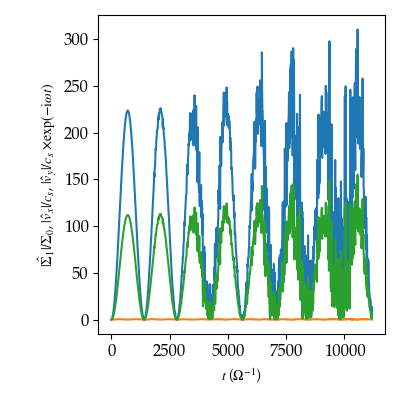

In [3]:
w_q2 = widgets.FloatSlider(
    value=5,
    min=0.5,
    max=5,
    step=0.01,
    description=r'$Q$:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

w_k2 = widgets.FloatSlider(
    value=1,
    min=-2,
    max=2,
    step=0.01,
    description=r'$k$:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

# Display eccentricity slider
display(w_q2, output)
display(w_k2, output)

def amplitudes(t, y0, k, Q):
    res1 = 0.0*t + 1.0e-16j
    res2 = 0.0*t + 1.0e-16j
    res3 = 0.0*t + 1.0e-16j
    
    #if (Q == 1.0):
    #    Q = 1.01
        
    A = np.array([[0, -1j*k, 0], 
                  [-1j*k*(1 - 2/(Q*np.abs(k)+1.0e-16 )), 0, 2],
                  [0, -0.5, 0]])

    
    for i in range(0, len(t)):
        res = np.matmul(expm(A*t[i]), y0)
        res1[i] = res[0]
        res2[i] = res[1]
        res3[i] = res[2]
        
    return res1, res2, res3

wave_number2 = 1.0
Q_toomre2 = 10.0

omega2 = disp_w2(wave_number2, Q_toomre2)
maxt = 50.0/(np.sqrt(np.abs(omega2)) + 1.0e-16)
if (omega2 < 0.0):
    maxt = 20.0/(np.sqrt(np.abs(omega2)) + 1.0e-16)


fig2 = plt.figure(figsize=(4,4),num='Perturbation amplitudes')
ax2 = plt.gca()

ax2.set_xlabel(r'$t$ ($\Omega^{-1}$)')
ax2.set_ylabel(r'$|\hat\Sigma_1|/\Sigma_0$, $|\hat v_x|/c_s$, $|\hat v_y|/c_s$ $\times \exp(-{\rm i}\omega t)$')

y0 = [1.0e-3, 1.0e-4, 1.0e-3]


t = np.linspace(0, maxt, 1000)

W, vx, vy = amplitudes(t, y0, wave_number2, Q_toomre2)
lineW, = ax2.plot(t, np.abs(W))
lineX, = ax2.plot(t, np.abs(vx))
lineY, = ax2.plot(t, np.abs(vy))

#line2, = ax2.plot(wave_number, disp_w2(wave_number, Q_toomre));

# (1/kappa)*dW/dt = -i*(k*cs/kappa)*(vx/cs)
# 1/(kappa)*d(vx/cs)/dt = -i*(k*cs)/kappa*(1 - 2*kappa/(Q*|k*cs|))*W + 2*Omega*(vy/cs)/kappa
# 1/(kappa)*d(vy/cs)/dt = (S - 2*Omega)*(vx/cs)/kappa

plt.tight_layout()


def on_value_change_q2(change):
    with output:
        global Q_toomre2
        Q_toomre2 = change['new']
        if (Q_toomre2 == 1.0):
            Q_toomre2 = 1.00001
        
        omega2 = disp_w2(wave_number2, Q_toomre2)
        maxt = 50.0/(np.sqrt(np.abs(omega2)) + 1.0e-16)
        if (omega2 < 0.0):
            maxt = 20.0/(np.sqrt(np.abs(omega2)) + 1.0e-16)

        y0 = [1.0e-3, 1.0e-4, 1.0e-3]
        t = np.linspace(0, maxt, 1000)

        W, vx, vy = amplitudes(t, y0, wave_number2, Q_toomre2)
        lineW.set_data(t, np.abs(W))
        lineX.set_data(t, np.abs(vx))
        lineY.set_data(t, np.abs(vy))

        ax2.relim()
        ax2.autoscale()
        plt.tight_layout()
 
def on_value_change_k2(change):
    with output:
        global wave_number2
        wave_number2 = change['new']
        
        omega2 = disp_w2(wave_number2, Q_toomre2)
        maxt = 50.0/(np.sqrt(np.abs(omega2)) + 1.0e-16)
        if (omega2 < 0.0):
            maxt = 20.0/(np.sqrt(np.abs(omega2)) + 1.0e-16)

        y0 = [1.0e-3, 1.0e-4, 1.0e-3]
        t = np.linspace(0, maxt, 1000)

        W, vx, vy = amplitudes(t, y0, wave_number2, Q_toomre2)
        lineW.set_data(t, np.abs(W))
        lineX.set_data(t, np.abs(vx))
        lineY.set_data(t, np.abs(vy))

        ax2.relim()
        ax2.autoscale()
        plt.tight_layout()
 
w_q2.observe(on_value_change_q2, names='value')
w_k2.observe(on_value_change_k2, names='value')


## Solution in real space

Finally, we restore the spatial dependence of the perturbations, focusing on the surface density perturbation \\(\Sigma_1(x,t)\\). Below you see an example of \\(\Sigma_1\\) at \\(t=0\\) for \\(Q=5\\) and \\(k c_s/\kappa=1\\). As should be obvious from the form we took for the perturbations, we are dealing with sinusoidal solutions. Note that the amplitude is \\(0.001\\), so that indeed \\(\Sigma_1 \ll \Sigma_0\\).

<IPython.core.display.Javascript object>


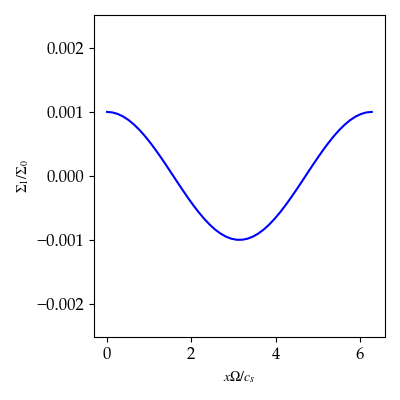

In [4]:
wave_number3 = 1.0
Q_toomre3 = 5.0

omega2 = disp_w2(wave_number3, Q_toomre3)
maxt = 2.0*np.pi/(np.sqrt(np.abs(omega2)) + 1.0e-16)
if (omega2 < 0.0):
    maxt = 20.0/(np.sqrt(np.abs(omega2)) + 1.0e-16)


fig3 = plt.figure(figsize=(4,4),num='Real space solution')
ax3 = plt.gca()

ax3.set_xlabel(r'$x \Omega/c_s$')
ax3.set_ylabel(r'$\Sigma_1/\Sigma_0$')

y0 = [1.0e-3, 1.0e-4, 1.0e-3]
t = np.linspace(0, maxt, 100)

W, vx, vy = amplitudes(t, y0, wave_number3, Q_toomre3)

x = np.linspace(0, 2.0*np.pi/wave_number3)
line3, = ax3.plot(x, np.real(W[0]*np.exp(1j*wave_number3*x)), color='b')

mx = np.max(np.abs(W))
ax3.set_ylim([-mx, mx])

plt.tight_layout()


The solution of course evolves in time. Below you can see a movie of how the mode evolves. You can move the sliders to explore different values of \\(Q\\) and different wave numbers. Note that it takes a bit of time to generate the movie.

In [5]:
w_q3 = widgets.FloatSlider(
    value=5,
    min=0.5,
    max=5,
    step=0.01,
    description=r'$Q$:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

w_k3 = widgets.FloatSlider(
    value=1,
    min=-2,
    max=2,
    step=0.01,
    description=r'$k$:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.3f',
)

# Display eccentricity slider
display(w_q3, output)
display(w_k3, output)

repeat = True

class GI_anim():
    def __init__(self, _W, _k, _t, _x, _repeat, _line):
        self.repeat = _repeat
        self.W = _W
        self.t = _t
        self.k = _k
        self.x = _x
        self.line = _line
        
    def init(self):
        self.line.set_data(self.x, np.real(self.W[0]*np.exp(1j*self.k*self.x)))
    
    def animate(self, i):
        self.line.set_data(self.x, np.real(self.W[i]*np.exp(1j*self.k*self.x)))

    def show(self, fig):
        anim = animation.FuncAnimation(fig, self.animate, init_func = self.init,
                                       frames = len(self.t), repeat=self.repeat, interval=20, blit=True)
        res = HTML(anim.to_jshtml())
        
        anim._stop()
        
        return res
    
display(GI_anim(W, wave_number3, t, x, repeat, line3).show(fig3), display_id='span')


def on_value_change_q3(change):
    with output:
        global Q_toomre3
        Q_toomre3 = change['new']
        if (Q_toomre3 == 1.0):
            Q_toomre3 = 1.001
        
        omega2 = disp_w2(wave_number3, Q_toomre3)
        maxt = 2.0*np.pi/(np.sqrt(np.abs(omega2)) + 1.0e-16)
        if (omega2 < 0.0):
            maxt = 20.0/(np.sqrt(np.abs(omega2)) + 1.0e-16)

        y0 = [1.0e-3, 1.0e-4, 1.0e-3]
        t = np.linspace(0, maxt, 100)

        W, vx, vy = amplitudes(t, y0, wave_number3, Q_toomre3)
        
        x = np.linspace(0, 2.0*np.pi/wave_number3)
        line3.set_data(x, np.real(W[0]*np.exp(1j*wave_number3*x)))

        ax3.relim()
        ax3.autoscale()

        mx = np.max(np.abs(W))
        ax3.set_ylim([-mx, mx])

        plt.tight_layout()
 
        update_display(GI_anim(W, wave_number3, t, x, repeat, line3).show(fig3), display_id='span')

def on_value_change_k3(change):
    with output:
        global wave_number3
        wave_number3 = change['new']
        
        omega2 = disp_w2(wave_number3, Q_toomre3)
        maxt = 2.0*np.pi/(np.sqrt(np.abs(omega2)) + 1.0e-16)
        if (omega2 < 0.0):
            maxt = 20.0/(np.sqrt(np.abs(omega2)) + 1.0e-16)

        y0 = [1.0e-3, 1.0e-4, 1.0e-3]
        t = np.linspace(0, maxt, 100)

        W, vx, vy = amplitudes(t, y0, wave_number3, Q_toomre3)

        x = np.linspace(0, 2.0*np.pi/wave_number3)
        line3.set_data(x, np.real(W[0]*np.exp(1j*wave_number3*x)))

        ax2.relim()
        ax2.autoscale()
        
        mx = np.max(np.abs(W))
        ax3.set_ylim([-mx, mx])

        plt.tight_layout()
 
        update_display(GI_anim(W, wave_number3, t, x, repeat, line3).show(fig3), display_id='span')

w_q3.observe(on_value_change_q3, names='value')
w_k3.observe(on_value_change_k3, names='value')


FloatSlider(value=5.0, continuous_update=False, description='$Q$:', max=5.0, min=0.5, readout_format='.3f', st…

Output()

FloatSlider(value=1.0, continuous_update=False, description='$k$:', max=2.0, min=-2.0, readout_format='.3f', s…

Output()